# Explore here

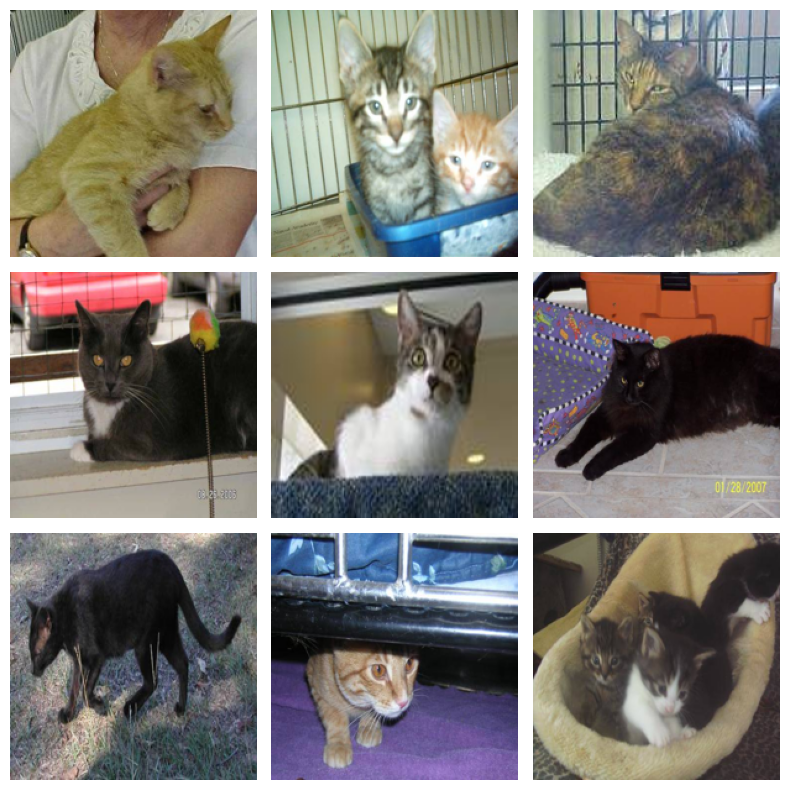

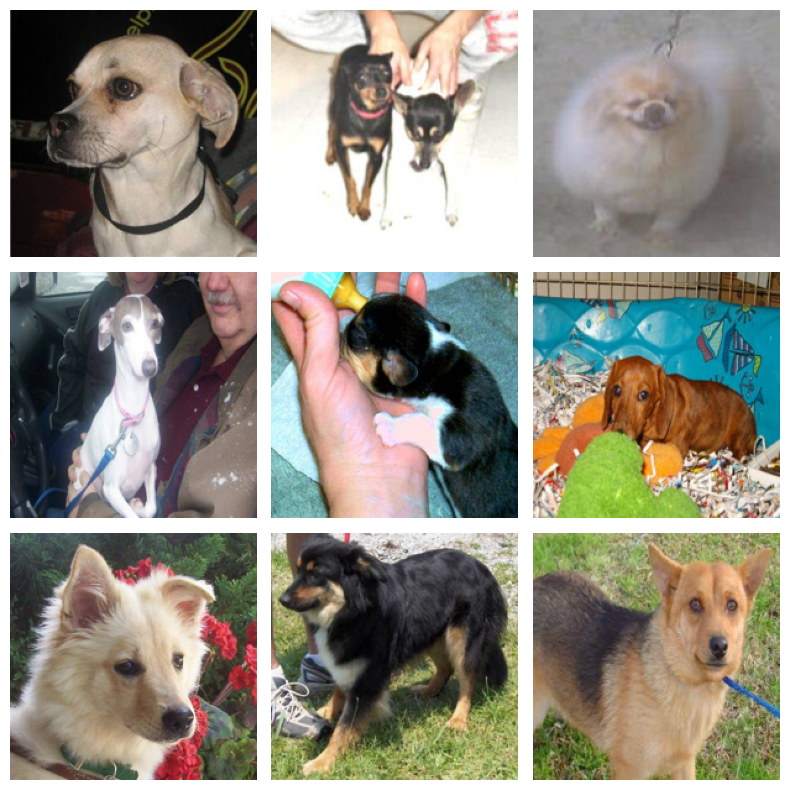

In [2]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np

# Mostrar 9 imágenes de gatos
cat_dir = 'dataset/train/cats'
dog_dir = 'dataset/train/dogs'

cat_images = os.listdir(cat_dir)[:9]
dog_images = os.listdir(dog_dir)[:9]

def show_images(images, label):
    fig, axes = plt.subplots(3, 3, figsize=(8,8))
    for img, ax in zip(images, axes.flatten()):
        image = Image.open(os.path.join(label, img)).resize((200, 200))
        ax.imshow(image)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

show_images(cat_images, cat_dir)
show_images(dog_images, dog_dir)


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(150, 150),
    batch_size=16, 
    class_mode='categorical'
)


val_generator = val_datagen.flow_from_directory(
    'dataset/validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense

model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(224,224,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(GlobalAveragePooling2D())  # reemplaza Flatten()
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))


In [8]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)
steps_per_epoch = 50  
validation_steps = 20

model.fit(
    train_generator,
    validation_data=val_generator,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    epochs=5,
    callbacks=[early_stop, checkpoint]
)


Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5304 - loss: 0.6938

2025-06-17 00:18:43.422895: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2025-06-17 00:18:45.787807: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.


50/50 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.5303 - loss: 0.6938 - val_accuracy: 0.4875 - val_loss: 0.7006
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4914 - loss: 0.6965

50/50 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.4915 - loss: 0.6965 - val_accuracy: 0.4891 - val_loss: 0.6919
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5054 - loss: 0.6920

50/50 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.5054 - loss: 0.6920 - val_accuracy: 0.5125 - val_loss: 0.6906
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5040 - loss: 0.6921

50/50 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.5038 - loss: 0.6921 - val_accuracy: 0.5391 - val_loss: 0.6911
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.5451 - loss: 0.6903 - val_accuracy: 0.4984 - val_loss: 0.6885
